# MediBOT EDA

In [1]:
# https://www.kaggle.com/datasets/noorsaeed/medicine-recommendation-system-dataset
# Importing libraries, reading the data & cheking the shape of it.
# import os
# import re
# import uuid
# import string
# import base64
# import datetime
import pickle
import warnings
import pandas as pd
import numpy as np
import datetime as dt
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Probablity Distribution / Hypothesis Testing
from scipy import stats
from scipy.stats import binom, norm, poisson, expon, geom, lognorm, levene, kstest, shapiro
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel # T-test
from scipy.stats import chi2, chisquare, chi2_contingency # Chi-square test
from scipy.stats import pearsonr, spearmanr               # Corelation test
from scipy.stats import f_oneway                          # ANOVA
# from statsmodels.stats.multicomp import MultiComparison

# Pre-processing Libraries
#!pip install category_encoders
#from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay,
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, precision_recall_curve,
    mean_squared_error as mse, mean_absolute_error as mae,
    mean_absolute_percentage_error as mape, r2_score, silhouette_score )
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dimension Reduction Libraries
# from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectFromModel

# Transformation Libraries
from sklearn.compose import ColumnTransformer

# PipeLine Liraries
from sklearn.pipeline import Pipeline

# Machine Learning Libraries -- Classification / Regression Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier


#Clustering Libraries
import scipy.cluster.hierarchy as shc
from sklearn.impute import KNNImputer
from sklearn.cluster import MiniBatchKMeans, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Time Series Libraries
# !pip install fbprophet
# import statsmodels.api as sm
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.seasonal import seasonal_decompose
# from fbprophet import Prophet
warnings.filterwarnings("ignore")

In [2]:
# Libraries for LLM, LangChain, LLama, HuggingFace, VectorStorages
# from unstructred.partition.pdf import partition_pdf
# from langchain.chat_models import ChatOpenAI
# from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.schema.messages import HumanMessage, SystemMessage
from langchain.schema.document import Document
from langchain.vectorstores import FAISS
from langchain.retrievers.multi_vector import MultiVectorRetriever

import spacy
#import contractions

# NLP Libraries
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
# from gensim.models import Word2Vec
from IPython.core.display import HTML, display
from IPython.display import Image
from spacy.lang.en.stop_words import STOP_WORDS
#from gensim.models import Word2Vec
#from langdetect import DetectorFactory, detect
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# DeepLearning Libraries
# import tensorflow as tf
# from tensorflow import keras
# from keras.callbacks import TensorBoard
#from keras.optimizers import Adam
# from keras.layers import *
# from keras.models import *
# from keras.utils import *
# from keras.applications import *
# from keras.initializers import GlorotUniform
# from keras_preprocessing.sequence import pad_sequences
# from tensorflow_addons.utils.types import FloatTensorLike, TensorLike
# from tensorflow_addons.layers import CRF
# from tensorflow_addons.losses import SigmoidFocalCrossEntropy
# from tensorflow_addons.optimizers import AdamW
# from livelossplot import PlotLossesKeras
#import conllu
from transformers import BertTokenizer
# from simpletransformers.ner import NERModel, NERArgs

# Custom Functions & Loading Data

In [3]:
# Custom Functions
def symtonsList(grp):
    syms = grp[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']].values.tolist()
    return list(set([str(item).strip() for sublist in syms for item in sublist]))

def wordCloudBar(sr):
    # Create wordCLoud
    cnt = Counter([str(item).strip() for sublist in sr for item in sublist])
    print(cnt.most_common(5))
    w = WordCloud(max_words = 5000 , width = 1600 , height = 800).generate_from_frequencies(frequencies=dict(cnt))
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(w)

In [4]:
def load_preprocess():
    # base = os.path.join('resources', 'data')
    global sym_trdf, sym_severdf, symsdf
    base = "C:\\ArjunData\\AppDev\\python\\MediBot\\resources\\data\\"
    sym_trdf = pd.read_csv(base + 'training.csv')
    sym_trdf['prognosis'] = sym_trdf['prognosis'].str.lower()
    sym_descdf = pd.read_csv(base + 'description.csv')
    sym_severdf = pd.read_csv(base + 'symptom-severity.csv').rename(columns={'Symptom':'Disease'})
    sym_severdf = sym_severdf.astype({'weight':'object'})
    symptomsdf = pd.read_csv(base + 'symtoms.csv').drop(columns=['Unnamed: 0'])
    symptomsdf = symptomsdf.groupby('Disease').apply(symtonsList)
    symptomsdf = pd.DataFrame(symptomsdf, columns=['Symtoms']).reset_index()

    dietsdf = pd.read_csv(base + 'diets.csv')
    medsdf = pd.read_csv(base + 'medications.csv')
    precautionsdf = pd.read_csv(base + 'precautions.csv')
    precautionsdf['Precautions'] = precautionsdf[['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values.tolist()
    precautionsdf.drop(columns=['Unnamed: 0','Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4'], inplace=True)
    precautionsdf['Disease'] = precautionsdf['Disease'].str.lower()
    workoutdf = pd.read_csv(base + 'workout.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
    workoutdf = workoutdf.groupby('disease', as_index=False).agg(list)
    workoutdf['Disease'] = workoutdf['disease'].str.lower()
    workoutdf.drop(columns=['disease'], inplace=True)
    
    # Merging symtoms related data
    symsdf = pd.merge(symptomsdf, sym_descdf, how='left', on='Disease')
    # symsdf = pd.merge(symsdf, sym_severdf, how='inner', on='Disease')
    symsdf = pd.merge(symsdf, medsdf, how='left', on='Disease')
    symsdf = pd.merge(symsdf, dietsdf, how='left', on='Disease')
    symsdf['Disease'] = symsdf['Disease'].str.lower()
    symsdf = pd.merge(symsdf, precautionsdf, how='left', on='Disease')
    symsdf = pd.merge(symsdf, workoutdf, how='left', on='Disease').dropna()
load_preprocess()
sym_trdf.shape

(4920, 133)

# Analysing Data

In [5]:
symsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1 to 40
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      37 non-null     object
 1   Symtoms      37 non-null     object
 2   Description  37 non-null     object
 3   Medication   37 non-null     object
 4   Diet         37 non-null     object
 5   Precautions  37 non-null     object
 6   workout      37 non-null     object
dtypes: object(7)
memory usage: 2.3+ KB


In [6]:
symsdf.describe()

,Disease,Symtoms,Description,Medication,Diet,Precautions,workout
count,37,37,37,37,37,37,37
unique,37,37,37,34,33,37,31
top,aids,"[high_fever, patches_in_throat, muscle_wasting...",AIDS (Acquired Immunodeficiency Syndrome) is a...,"['Antiviral drugs', 'IV fluids', 'Blood transf...","['Arthritis Diet', 'Anti-Inflammatory Diet', '...","[avoid open cuts, wear ppe if possible, consul...","[Follow a balanced and nutritious diet, Stay h..."
freq,1,1,1,3,3,1,3


In [7]:
symsdf.head()

,Disease,Symtoms,Description,Medication,Diet,Precautions,workout
1,aids,"[high_fever, patches_in_throat, muscle_wasting...",AIDS (Acquired Immunodeficiency Syndrome) is a...,"['Antiretroviral drugs', 'Protease inhibitors'...","['Balanced Diet', 'Protein-rich foods', 'Fruit...","[avoid open cuts, wear ppe if possible, consul...","[Follow a balanced and nutritious diet, Includ..."
2,acne,"[blackheads, pus_filled_pimples, scurring, ski...",Acne is a skin condition that occurs when hair...,"['Antibiotics', 'Pain relievers', 'Antihistami...","['Acne Diet', 'Low-Glycemic Diet', 'Hydration'...","[bath twice, avoid fatty spicy food, drink ple...","[Consume a balanced diet, Limit dairy and high..."
3,alcoholic hepatitis,"[abdominal_pain, swelling_of_stomach, distenti...",Alcoholic hepatitis is inflammation of the liv...,"['Antibiotics', 'Isoniazid', 'Rifampin', 'Etha...","['Liver-Healthy Diet', 'Low-fat Diet', 'Fruits...","[stop alcohol consumption, consult doctor, med...","[Avoid alcohol consumption, Follow a balanced ..."
4,allergy,"[watering_from_eyes, chills, shivering, contin...",Allergy is an immune system reaction to a subs...,"['Antihistamines', 'Decongestants', 'Epinephri...","['Elimination Diet', 'Omega-3-rich foods', 'Vi...","[apply calamine, cover area with bandage, nan,...","[Avoid allergenic foods, Consume anti-inflamma..."
5,arthritis,"[muscle_weakness, movement_stiffness, painful_...",Arthritis is inflammation of one or more joint...,"['Vestibular rehabilitation', 'Canalith reposi...","['Arthritis Diet', 'Anti-Inflammatory Diet', '...","[exercise, use hot and cold therapy, try acupu...","[Consume anti-inflammatory foods, Include omeg..."


* Training Dataset

In [8]:
sym_trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [9]:
sym_trdf.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [10]:
sym_trdf.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection


In [11]:
sym_trdf['prognosis'].nunique()

41

In [12]:
progs = sym_trdf['prognosis'].unique()
progs

array(['fungal infection', 'allergy', 'gerd', 'chronic cholestasis',
       'drug reaction', 'peptic ulcer diseae', 'aids', 'diabetes ',
       'gastroenteritis', 'bronchial asthma', 'hypertension ', 'migraine',
       'cervical spondylosis', 'paralysis (brain hemorrhage)', 'jaundice',
       'malaria', 'chicken pox', 'dengue', 'typhoid', 'hepatitis a',
       'hepatitis b', 'hepatitis c', 'hepatitis d', 'hepatitis e',
       'alcoholic hepatitis', 'tuberculosis', 'common cold', 'pneumonia',
       'dimorphic hemmorhoids(piles)', 'heart attack', 'varicose veins',
       'hypothyroidism', 'hyperthyroidism', 'hypoglycemia',
       'osteoarthristis', 'arthritis',
       '(vertigo) paroymsal  positional vertigo', 'acne',
       'urinary tract infection', 'psoriasis', 'impetigo'], dtype=object)

In [13]:
sym_trdf.dtypes.value_counts()

int64     132
object      1
Name: count, dtype: int64

In [14]:
symtn = list(set([item.strip() for sublist in symsdf['Symtoms'] for item in sublist if type(item) != float]))
len(symtn)

83

# Visualize Data

[('i', 7680), ('e', 5400), ('a', 5280), ('t', 4920), ('s', 4560)]


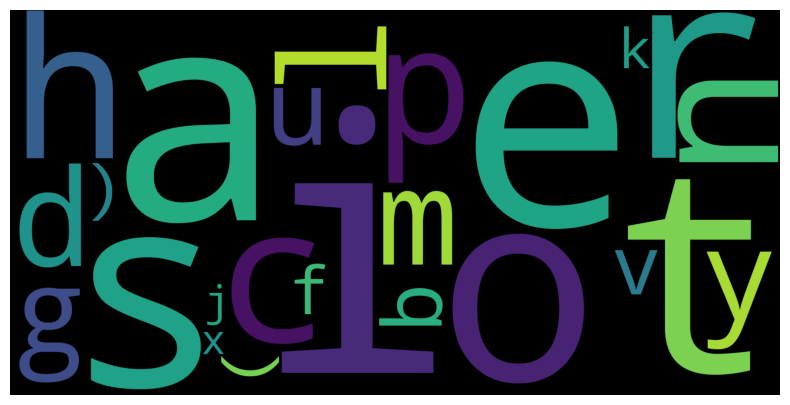

In [65]:
wordCloudBar(sym_trdf['prognosis'])

[('fatigue', 16), ('vomiting', 15), ('high_fever', 10), ('nan', 8), ('skin_rash', 7)]


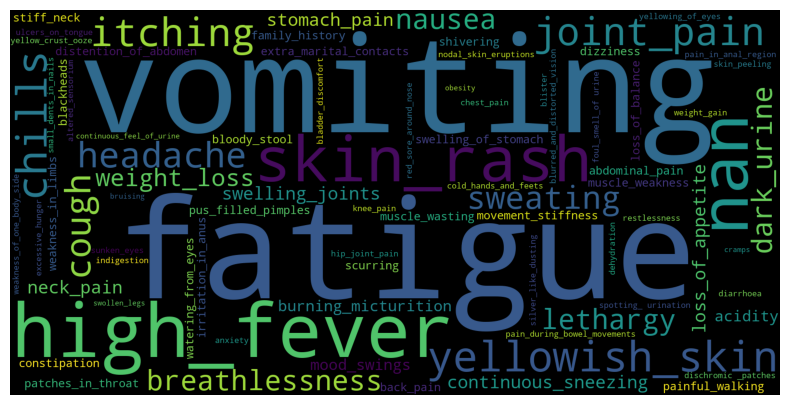

In [66]:
# Analysing Symtoms Data
wordCloudBar(symsdf['Symtoms'])

[("'", 370), ('i', 298), ('', 274), ('s', 228), ('t', 225)]


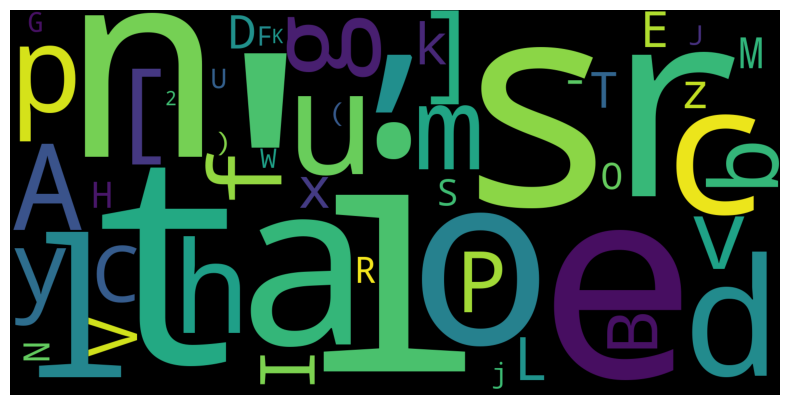

In [67]:
# Analysing Medication Data
wordCloudBar(symsdf['Medication'])

[("'", 370), ('', 355), ('i', 281), ('e', 236), ('o', 222)]


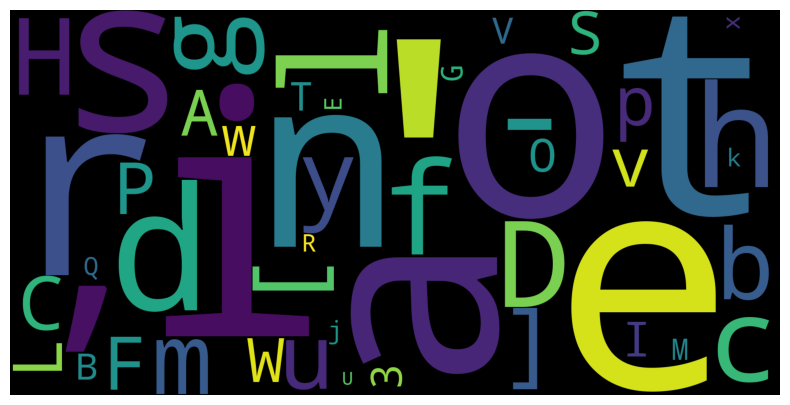

In [68]:
# Analysing Diet Data
wordCloudBar(symsdf['Diet'])

[('consult doctor', 14), ('medication', 10), ('eat healthy', 7), ('follow up', 6), ('avoid fatty spicy food', 5)]


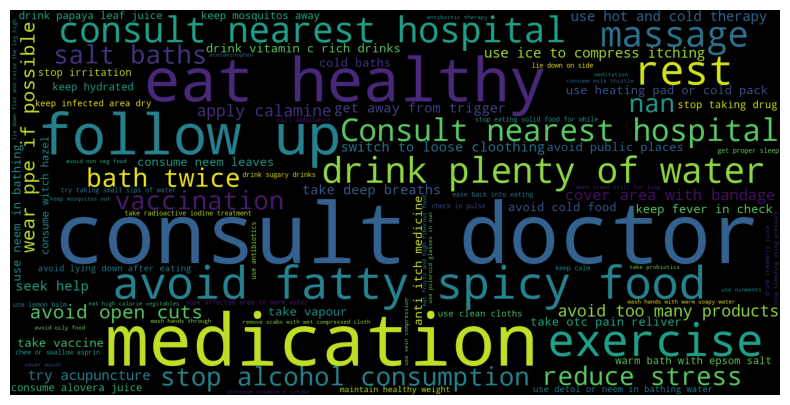

In [69]:
# Analysing Precautions Data
wordCloudBar(symsdf['Precautions'])

[('Stay hydrated', 38), ('Consult a healthcare professional', 32), ('Follow medical recommendations', 17), ('Gradually resume normal diet', 15), ('Rest and conserve energy', 13)]


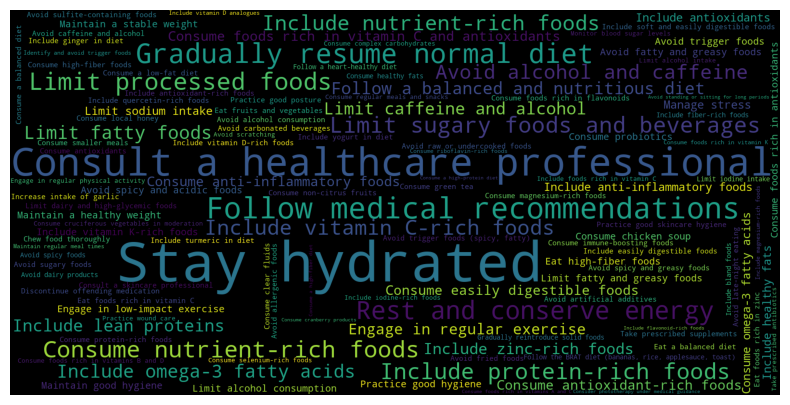

In [70]:
# Analysing workout Data
wordCloudBar(symsdf['workout'])

# Data Preparation for Model / Encoding / Imputation

* Train-Test Split Data

In [15]:
X = sym_trdf.drop(columns=['prognosis'])
y = sym_trdf['prognosis']
(X.shape, y.shape)

((4920, 132), (4920,))

In [16]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=42)
(X_tr.shape, X_te.shape), (y_tr.shape, y_te.shape)

(((4428, 132), (492, 132)), ((4428,), (492,)))

* Encoding Target Column

In [17]:
le = LabelEncoder()
le.fit_transform(progs)
y_tr = le.transform(y_tr)
y_te = le.transform(y_te)

In [18]:
X_te.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

# Model Training & Validation

Model:  RandomForest


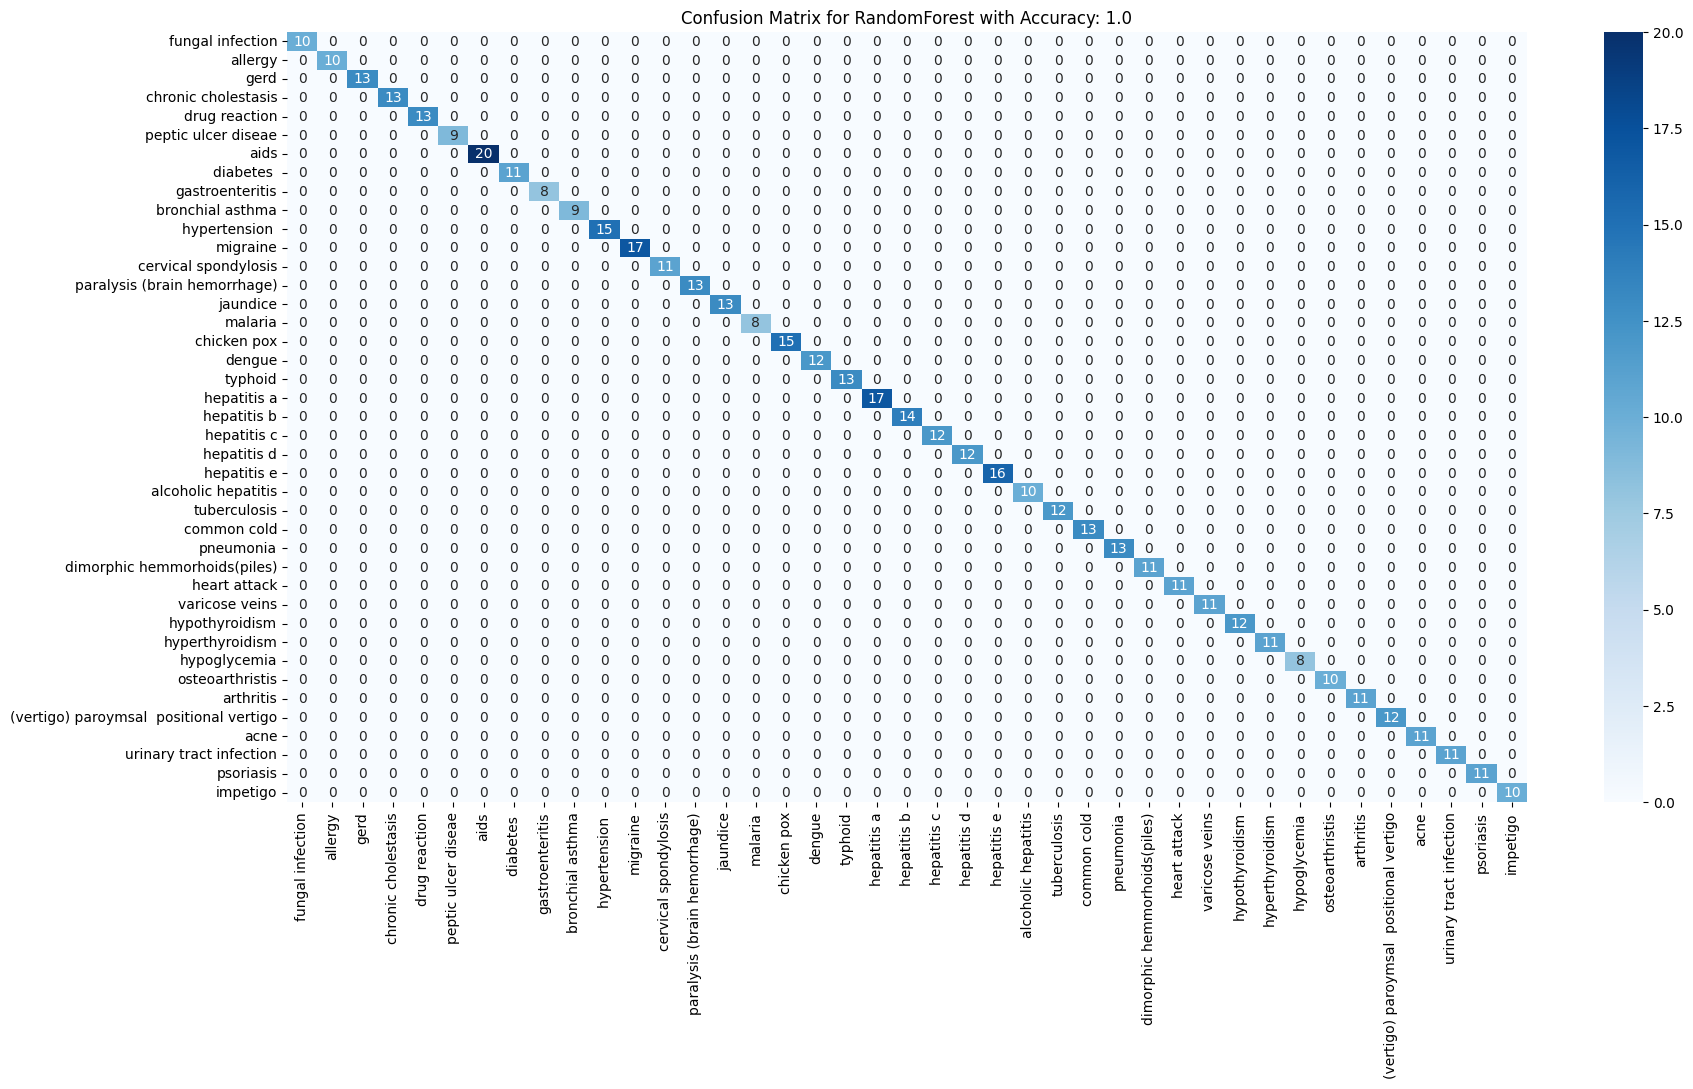

Model:  DecisionTree


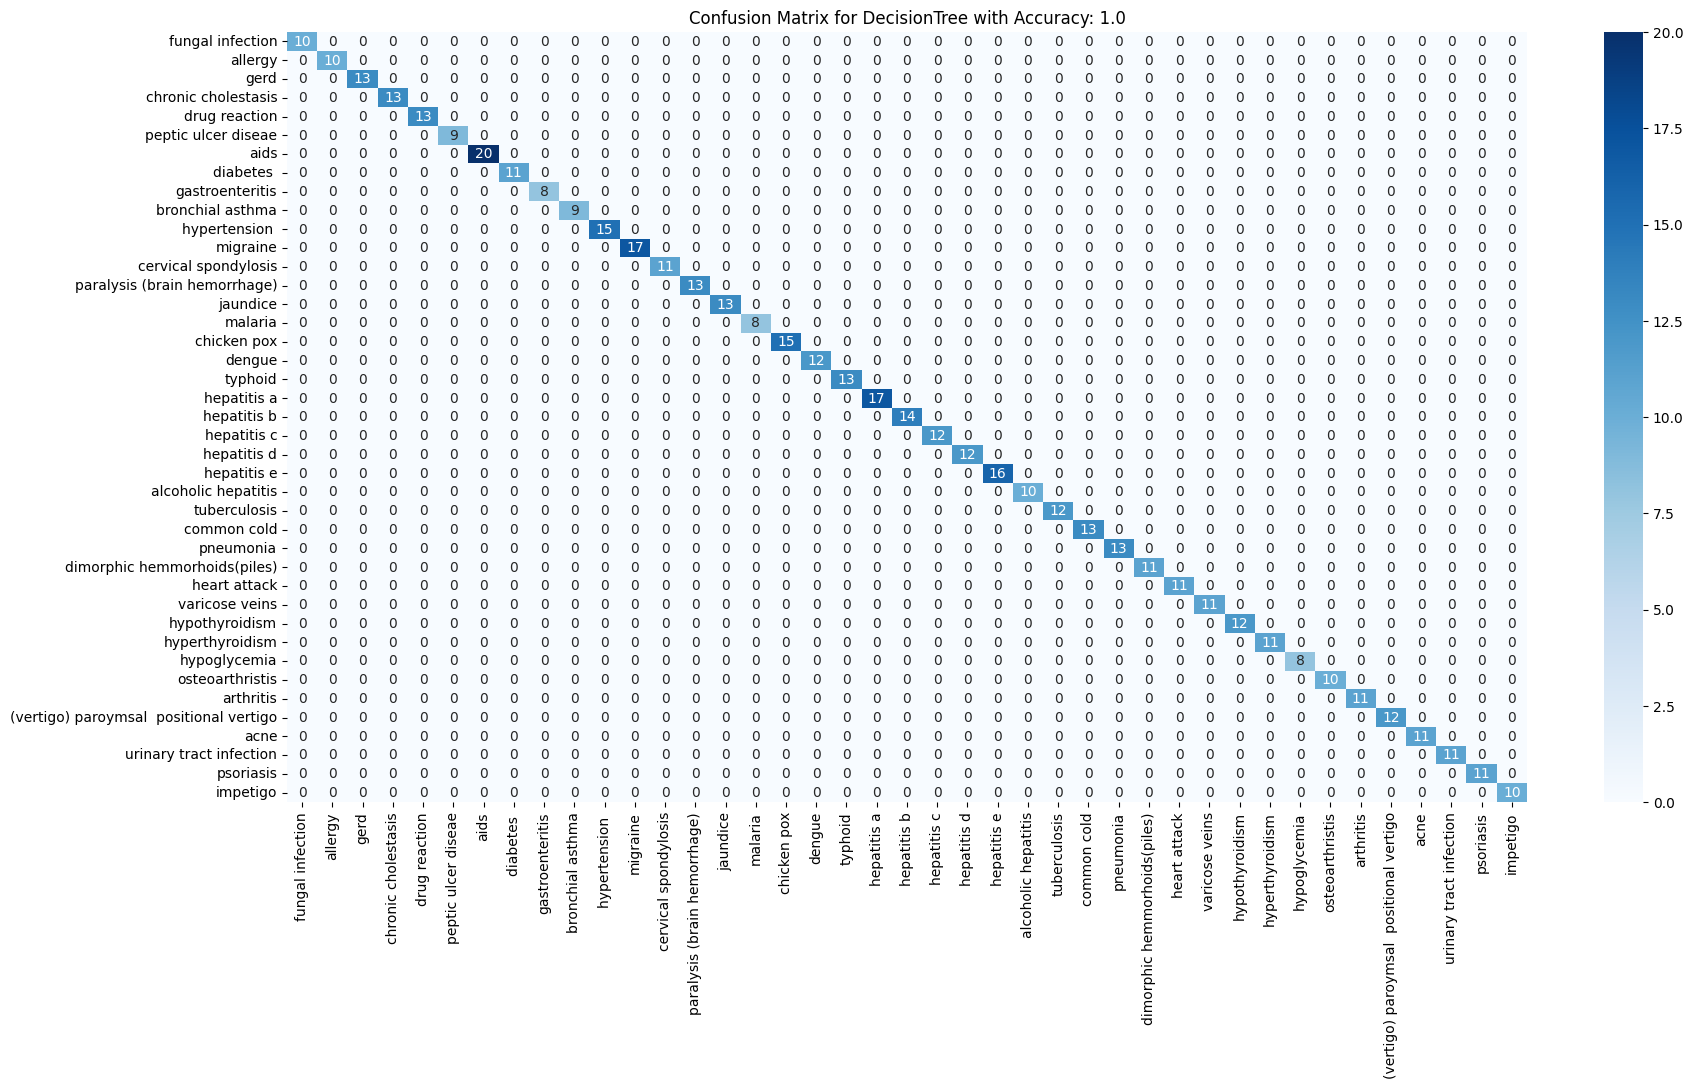

Model:  KNN


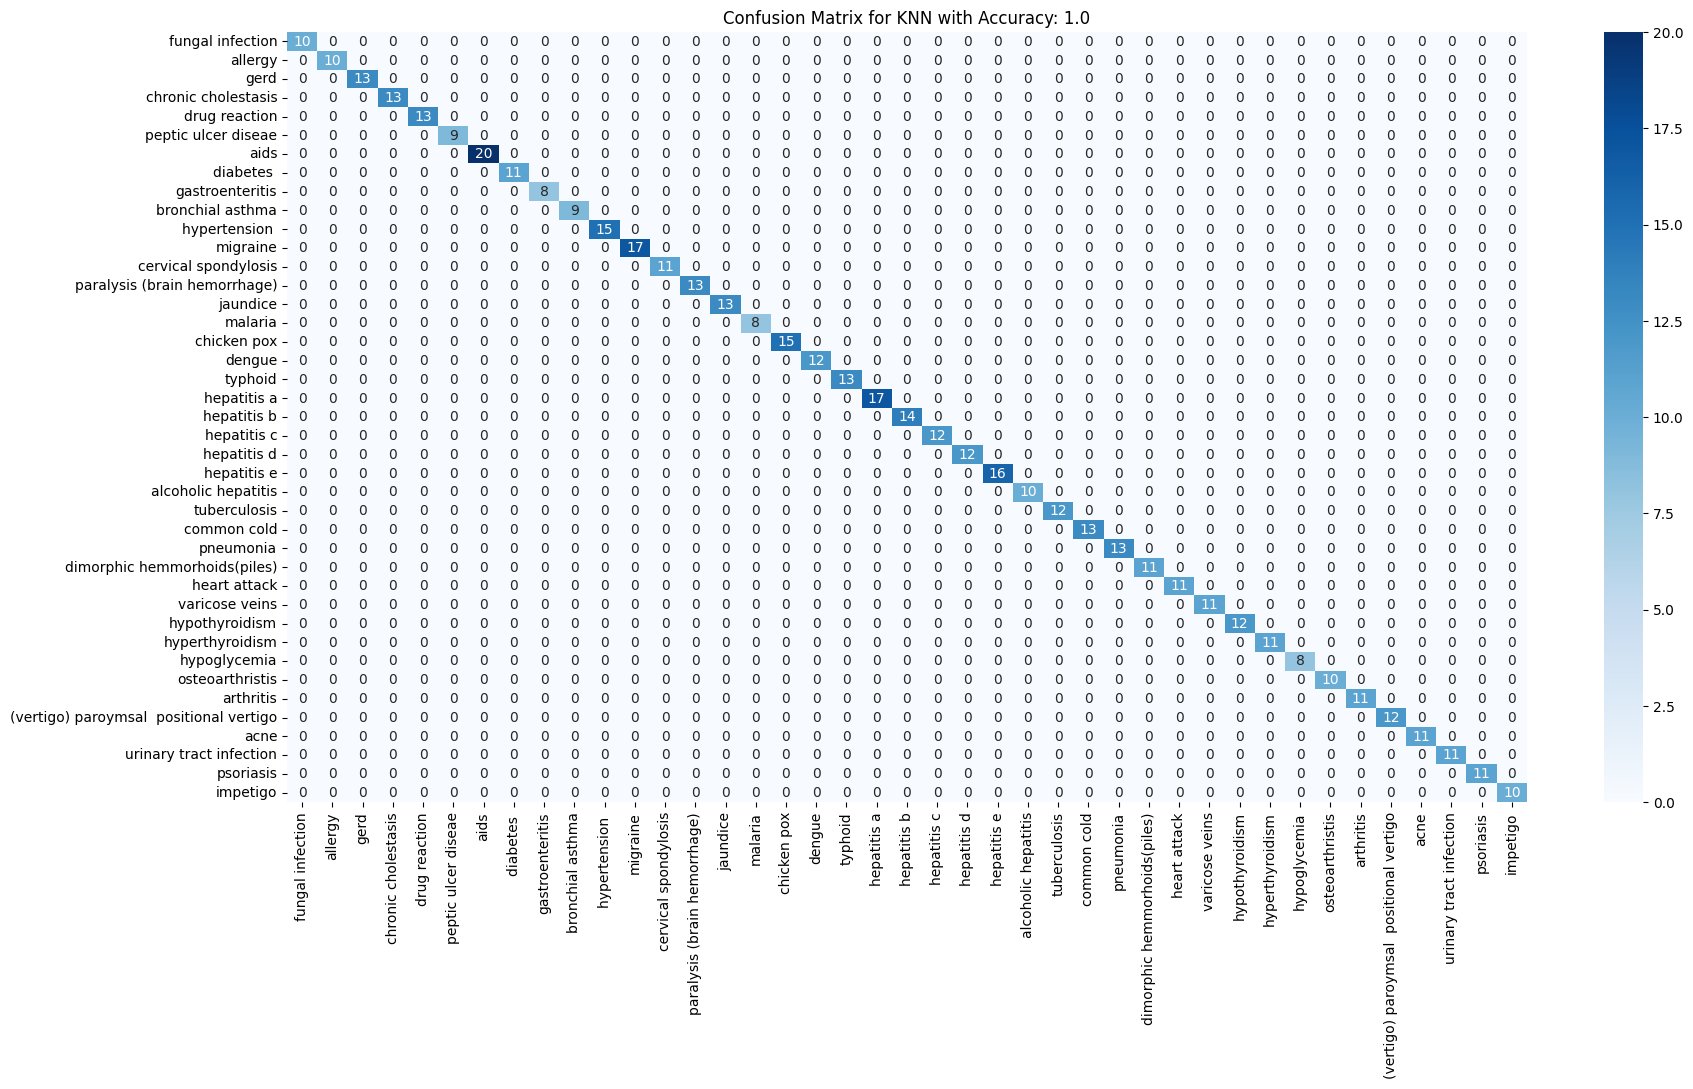

Model:  SVC


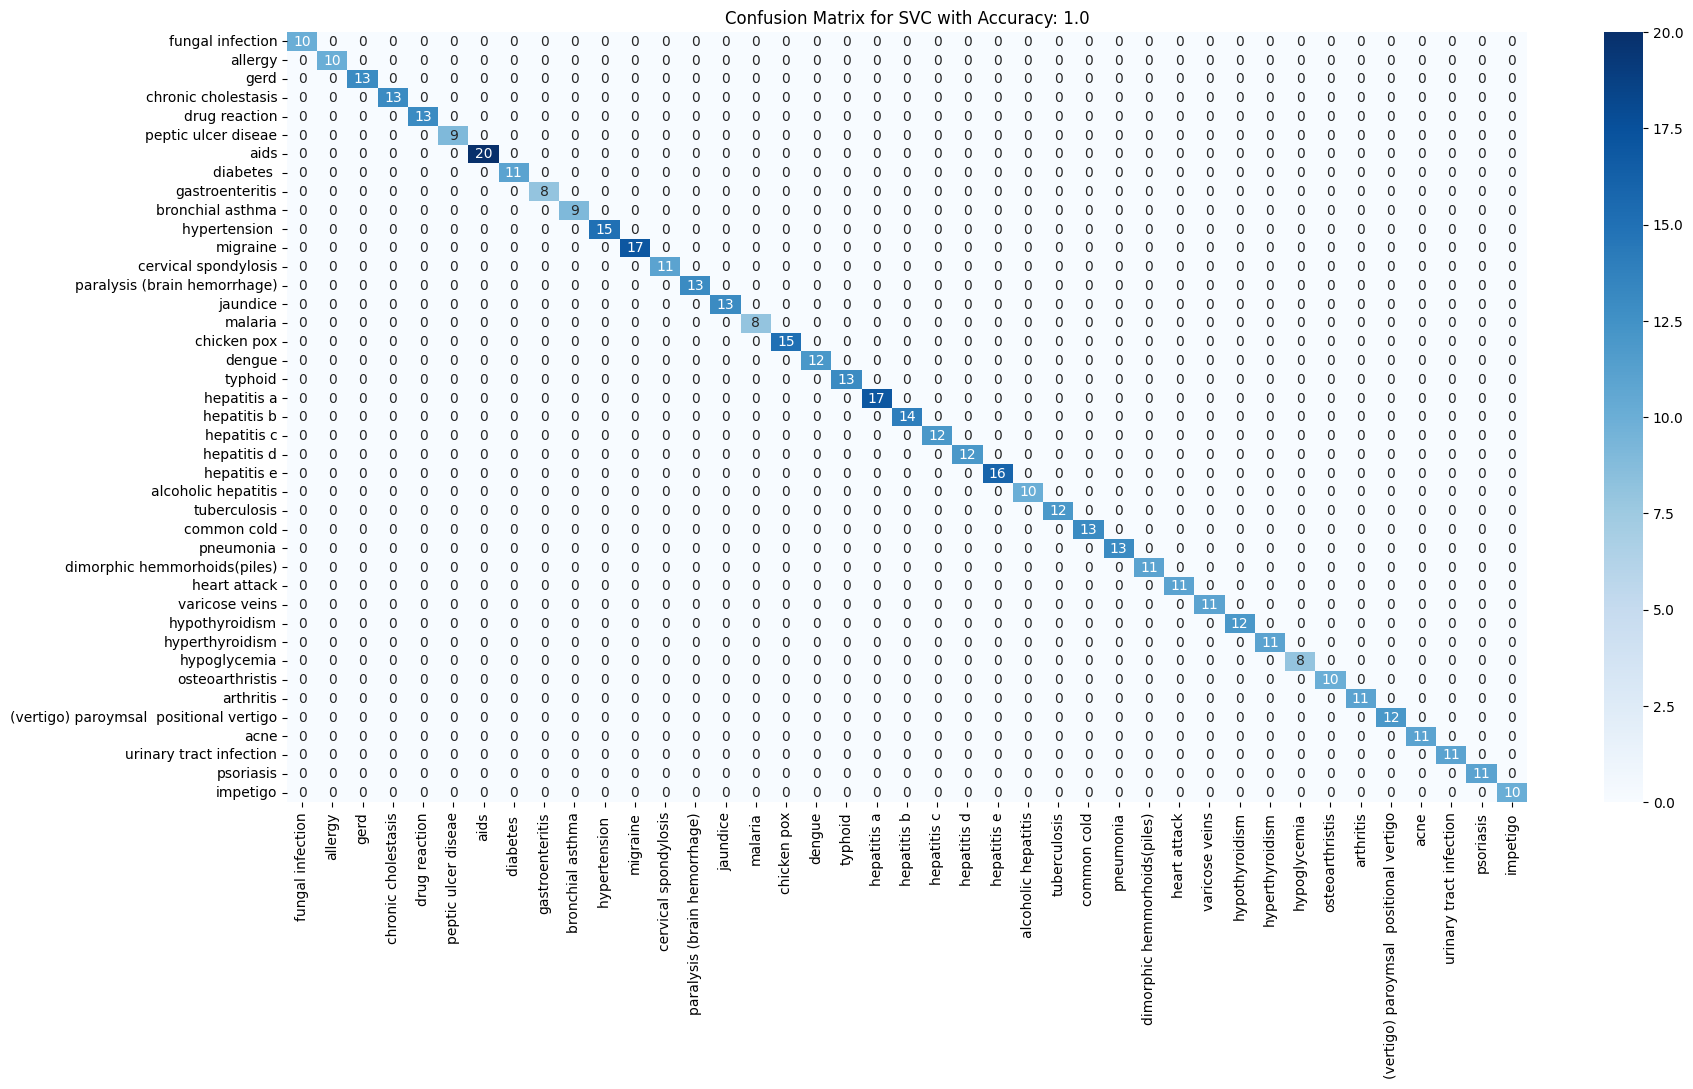

Model:  LogisticRegression


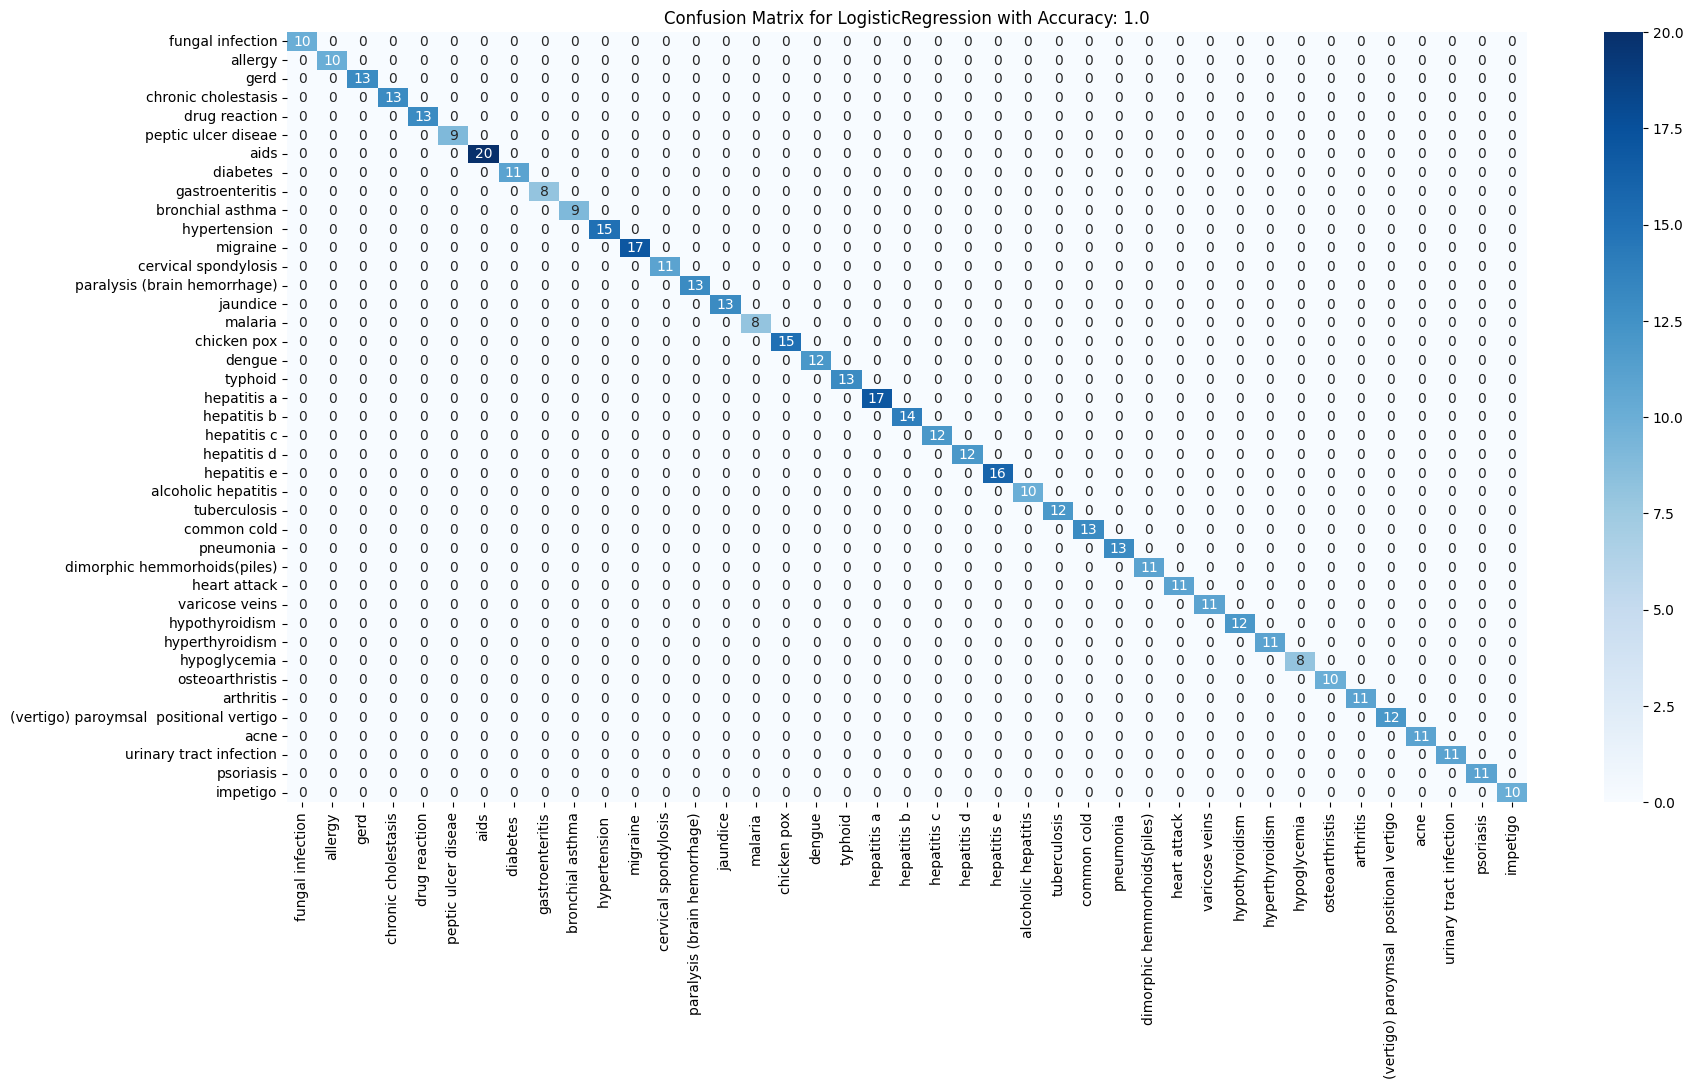

Model:  GradientBoostingClassifier


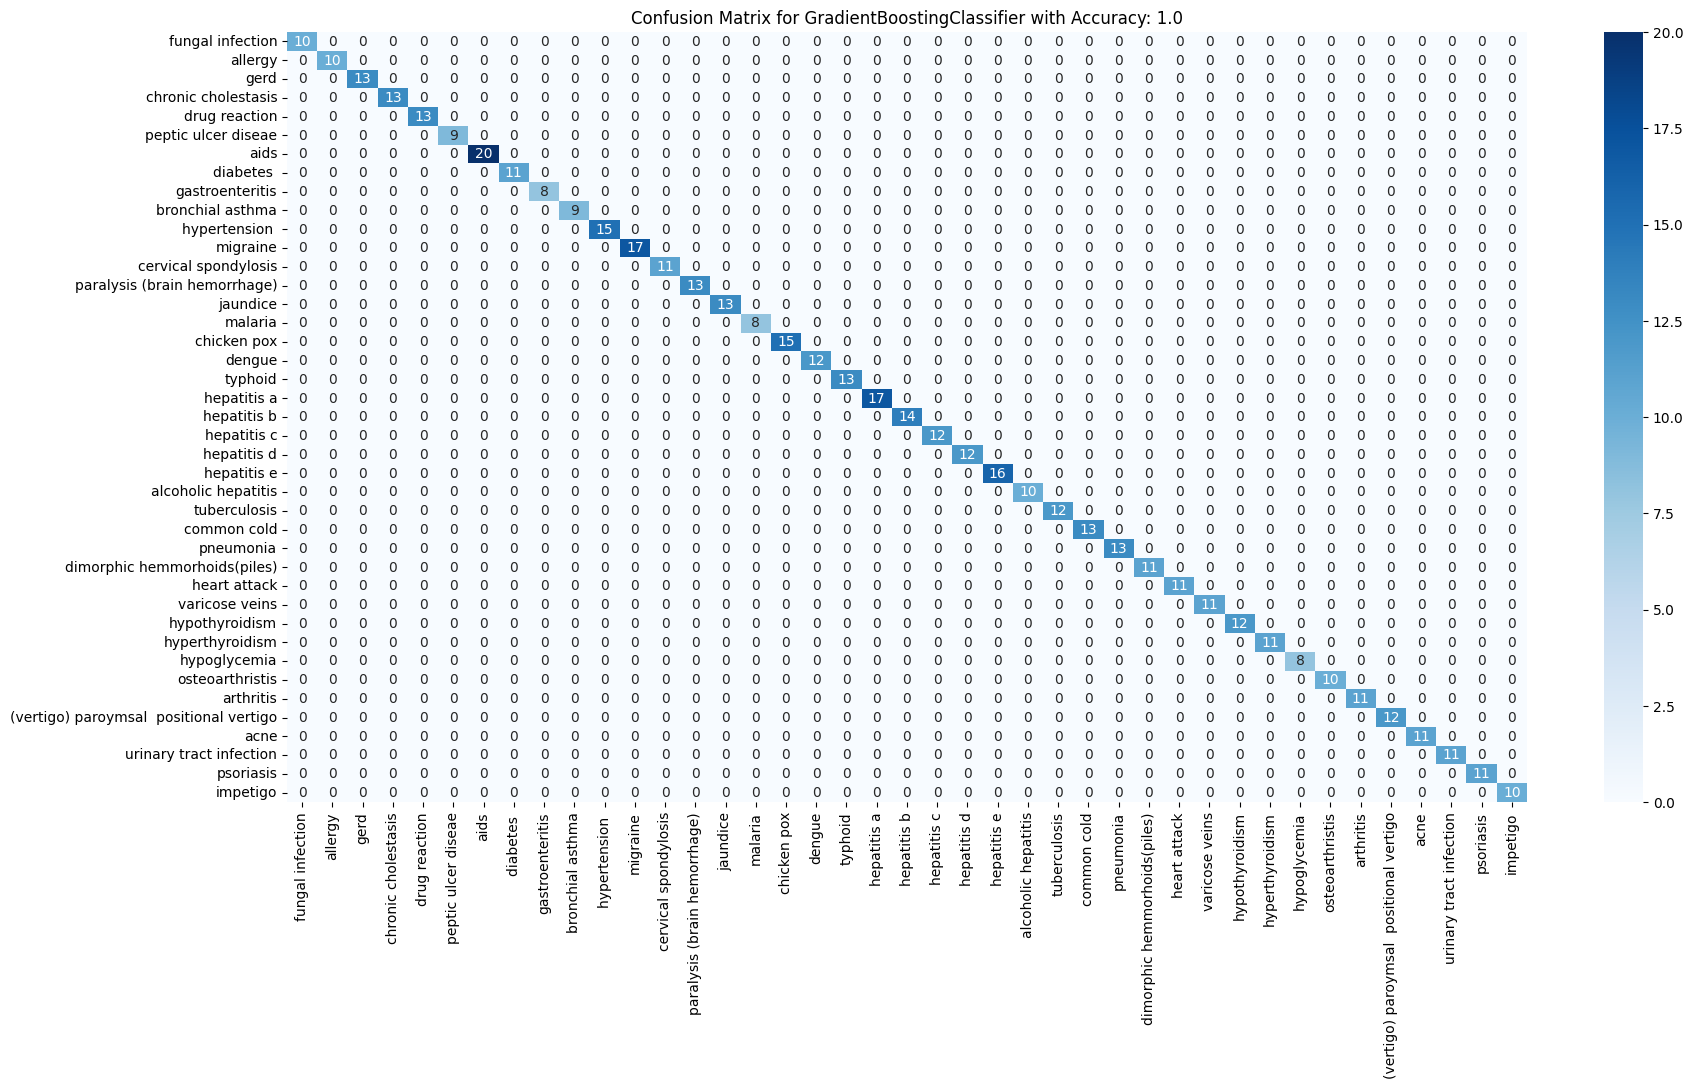

Model:  MultinomialNB


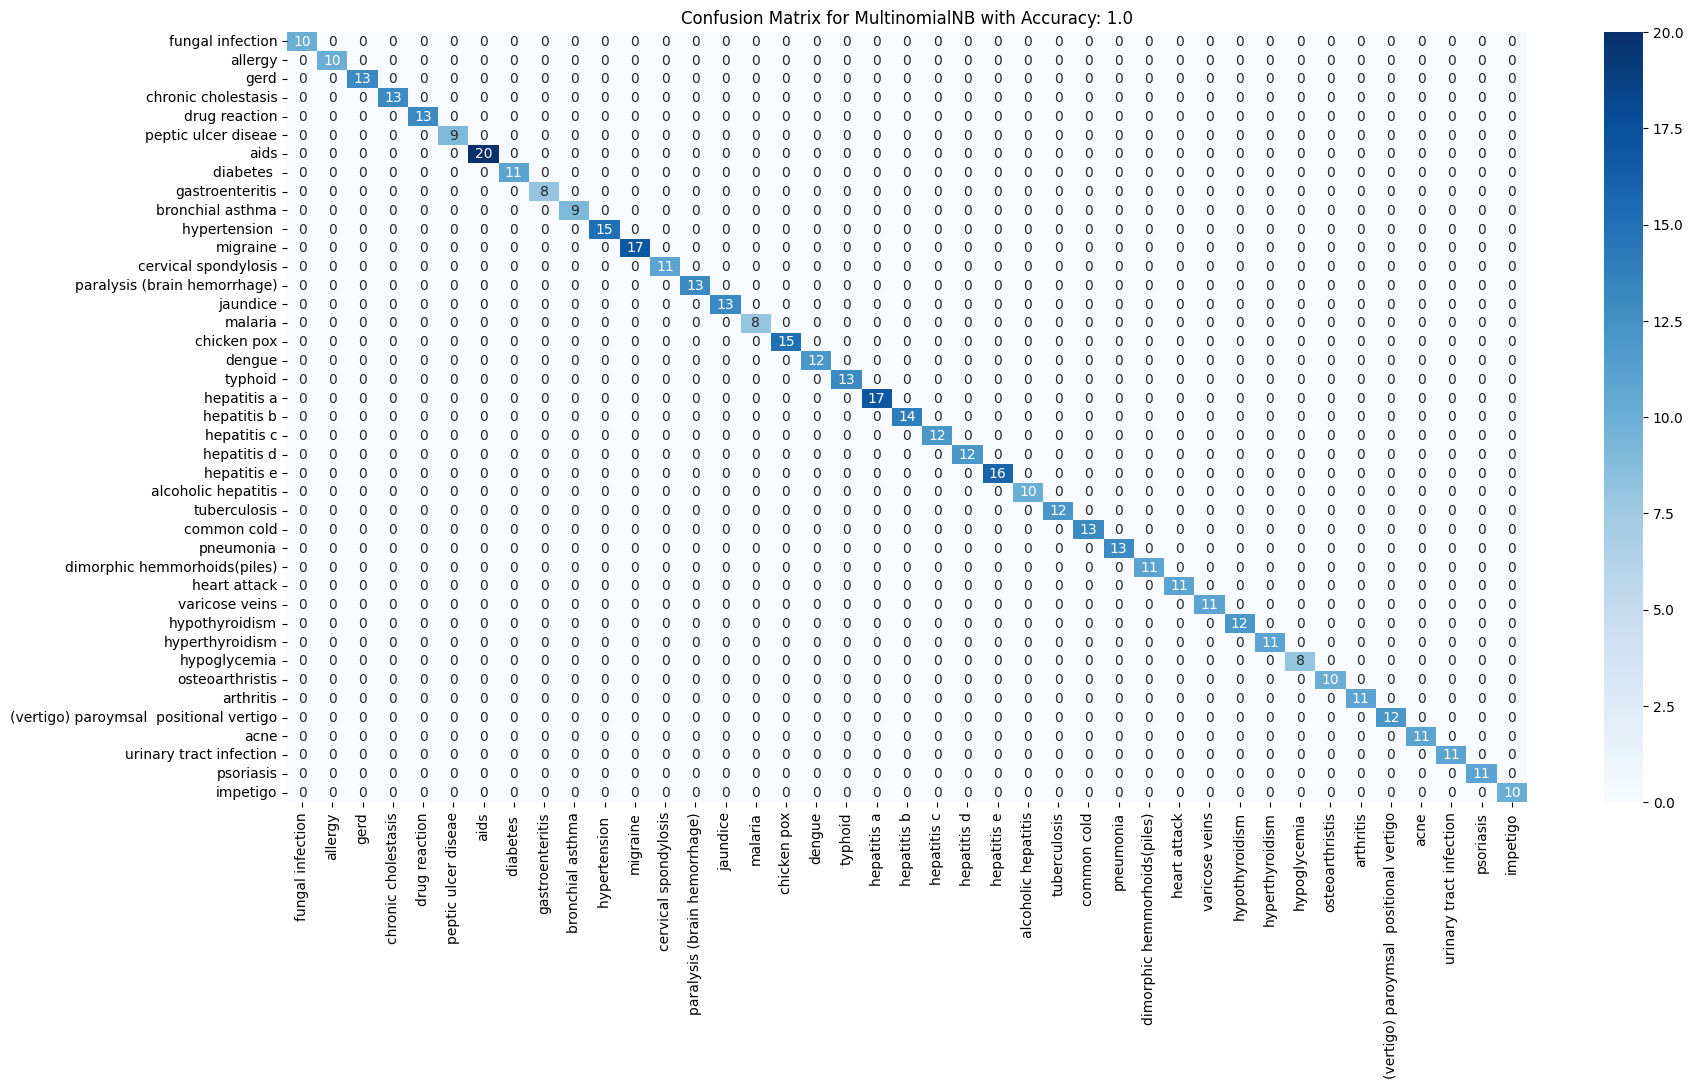

index                                               RandomForest
cls            (DecisionTreeClassifier(max_features='sqrt', r...
params               {'n_estimators': [8, 16, 32, 64, 128, 256]}
name                                                RandomForest
best_params                                  {'n_estimators': 8}
metrics                                                      1.0
Name: 0, dtype: object


In [19]:
models = {
    'RandomForest': {
        'cls': RandomForestClassifier(random_state=42),
        'params': {
            # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            # 'max_features':['sqrt','log2',None],
            'n_estimators': [8,16,32,64,128,256]
        }
    },
    'DecisionTree': {
        'cls': DecisionTreeClassifier(),
        'params': {
            'criterion':['entropy', 'log_loss', 'gini'],
            # 'splitter':['best','random'],
            # 'max_features':['sqrt','log2'],
        }
    },
    'KNN': {
        'cls': KNeighborsClassifier(),
        'params': {
            'n_neighbors':[5,7,9,11],
            # 'weights':['uniform','distance'],
            # 'algorithm':['ball_tree','kd_tree','brute']
        }
    },
    'SVC': {
        'cls': SVC(kernel='linear'),
        'params': { }
    },
    'LogisticRegression': {
        'cls': LogisticRegression(),
        'params': { }
    },
    'GradientBoostingClassifier': {
        'cls': GradientBoostingClassifier(random_state=42),
        'params': { }
    },
    'MultinomialNB': {
        'cls': MultinomialNB(),
        'params': { }
    }
    # 'XGBoost': XGBClassifier(),
    # 'LGBM': LGBMClassifier(verbose=-1),
}

for name, model in models.items():
    print("Model: ", name)
    models[name]['name'] = name
    cls = model['cls']
    params = model['params']
    
    # Train Model
    kf = KFold(3, shuffle=True, random_state=42)
    gs = GridSearchCV(estimator=cls, param_grid=params, cv=kf)
    gs.fit(X_tr, y_tr)
    
    cls.set_params(**gs.best_params_)
    cls.fit(X_tr, y_tr)
    # cv_scores = cross_val_score(model, X_tr, y_tr, cv=5, scoring='accuracy', n_jobs=-1)

    # Test Model
    preds = cls.predict(X_te)

    # Calculate Accuracy
    accu = accuracy_score(y_te, preds)

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_te, preds)

    models[name]['best_params'] = gs.best_params_
    models[name]['metrics'] = accu

    plt.figure(figsize=(20, 10))
    plt.title(f'Confusion Matrix for {name} with Accuracy: {accu}')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    sns.heatmap(data=cm, annot=True, fmt='g', cmap="Blues", xticklabels=progs, yticklabels=progs)
    plt.show()

best_model = pd.DataFrame.from_dict(models, orient='index').reset_index().sort_values(by=['metrics'], ascending=[False]).iloc[0]
print(best_model)

pickle.dump(best_model['cls'], open('model.pkl', 'wb'))



# Inference

In [30]:
model = pickle.load(open('model.pkl', 'rb'))
model.fit(X_tr, y_tr)
txt = "itching coughing sleeping aching".split()
inp = np.zeros(len(X_te.columns))
for s in txt:
    if s in X_te.columns:
        inp[list(X_te.columns).index(s)] = 1
predDisease = model.predict(inp.reshape(1, -1))
print(predDisease, progs[predDisease[0]])

[15] malaria


In [27]:
sym = symsdf[symsdf['Disease']==progs[predDisease[0]]]
sym

,Disease,Symtoms,Description,Medication,Diet,Precautions,workout
29,malaria,"[sweating, high_fever, chills, headache, vomit...",Malaria is a mosquito-borne infectious disease...,"['Antimalarial drugs', 'Antipyretics', 'Antiem...","['Malaria Diet', 'Hydration', 'High-Calorie Di...","[Consult nearest hospital, avoid oily food, av...","[Stay hydrated, Consume nutrient-rich foods, I..."


In [28]:
sym['Medication'].values

array(["['Antimalarial drugs', 'Antipyretics', 'Antiemetic drugs', 'IV fluids', 'Blood transfusions']"],
      dtype=object)

# Insights & Recommendations